In [3]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving Ventas_Totales_Limpio.csv to Ventas_Totales_Limpio.csv


{'Ventas_Totales_Limpio.csv': b',indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,ventas_totales_grupo_articulos,subtotal_ventas_alimentos_bebidas,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros\n0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,10230100.13,6864575.384,9047205.493,1716991.073,27858872.08,18043789.16,3514467.398,6705475.318,945906.3068,2880656.169,2606192.942,1050313.638,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309\n1,01/02/2017,25994.2,25223.4,25994200.17,25749179.4,245020.769,25994200.17,9719067.341,6438494.011,8309150.301,1527488.518,25994200.17,17656879.08,3344456.931,6576624.803,925618.6147,2855639.9,2600083.591,1026166.544,328288.

In [ ]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Ventas_Totales_Limpio.csv')
data= data.drop(['Unnamed: 0'], axis=1)
data

In [6]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

indice_tiempo                          0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

**PROCEDIMIENTO PARA SEPARAR DATAFRAME EN 2 PARTES (CUANTITATIVAS Y CUALITATIVAS)**

In [7]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[ : , [1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
Cuantitativas

In [ ]:
#Filtro para obtener variables cualitativas
Cualitativas=data.iloc[ : , [0]]
Cualitativas

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [14]:
y = Cuantitativas
Lim_Sup = y.mean() + 3*y.std()
Lim_Inf = y.mean() - 3*y.std()
print("Limite superior permitido", Lim_Sup)
print("Limite inferior permitido", Lim_Inf)

Limite superior permitido ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           1.976066e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.821184e+07
tarjetas_credito                       7.230605e+07
otros_medios                           1.048640e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.424194e+08
bebidas                                2.646939e+07
almacen                                5.596359e+07
panaderia                              6.969902e+06
lacteos                                2.243904e+07
carnes                                 2.528319e+07
verduleria_fruteria                    7.593897e+06
alimentos_preparados_rotiseria         1.796606e+06
articulos_limpieza_perfumeria          2.693328e+07
indumentaria_calzado_textiles_hogar   

In [ ]:
# Ajustar maximo de filas
pd.options.display.max_rows = None
# Obtener datos y outliers, que se convierten en nulos en el DataFrame
VT_sin_Outliers = Cuantitativas[(y<=Lim_Sup)&(y>=Lim_Inf)]
VT_sin_Outliers

In [17]:
# Corroborar valores nulos
nulos = VT_sin_Outliers.isnull().sum()
nulos

ventas_precios_corrientes              0
ventas_precios_constantes              2
ventas_totales_canal_venta             0
salon_ventas                           0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    1
electronicos_articulos_hogar           0
otros                                  1
dtype: int64

In [ ]:
# Realizar una copia del dataframe
VT_clean = VT_sin_Outliers.copy()

# Reemplazar valores atípicos (nulos) del dataframe con "mean"
VT_clean = VT_clean.fillna(round(VT_sin_Outliers.mean(),1))
VT_clean

In [ ]:
# Corroborar valores nulos
nulos = VT_clean.isnull().sum()
nulos

In [ ]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))            # Tamaño de la figura
VT_clean.plot(kind='box', vert=False)         # Ploteamos las variables cuantitativas, seleccionamso el diagrama de caja bigote
                                              # Y se hace vertical

plt.title("Valores Atípicos del Dataframe")   # Titulo de la grafica
plt.show()                                    # Para mostrar la grafica

In [21]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=Cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Lim_Sup_iqr = percentile75 + 1.5*iqr
Lim_Inf_iqr = percentile25 - 1.5*iqr
print("Limite superior permitido", Lim_Sup_iqr)
print("Limite inferior permitido", Lim_Inf_iqr)


Limite superior permitido ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.704401e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.095222e+07
tarjetas_credito                       6.385618e+07
otros_medios                           1.061843e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.145480e+08
bebidas                                2.282518e+07
almacen                                5.094749e+07
panaderia                              5.413785e+06
lacteos                                2.012752e+07
carnes                                 2.787050e+07
verduleria_fruteria                    7.832862e+06
alimentos_preparados_rotiseria         1.546751e+06
articulos_limpieza_perfumeria          2.773546e+07
indumentaria_calzado_textiles_hogar   

In [ ]:
# Obtener datos limpios del Dataframe
VT_sin_Outliers_iqr= Cuantitativas[(y<=Lim_Sup_iqr)&(y>=Lim_Inf_iqr)]
VT_sin_Outliers_iqr
# Corroborar valores nulos
nulos = VT_sin_Outliers-iqr.isnull().sum()
nulos

In [27]:
# Reemplazar valores atípicos (nulos) del dataframe con "mean"
# Realizar una copia del dataframe
VT_clean_iqr = VT_sin_Outliers_iqr.copy()
VT_clean_iqr = VT_clean_iqr.fillna(round(VT_sin_Outliers_iqr.mean(),1))
VT_clean_iqr

# Corroborar valores nulos
nulos = VT_clean_iqr.isnull().sum()
nulos

ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
otros                                  0
dtype: int64

<Figure size 1500x800 with 0 Axes>

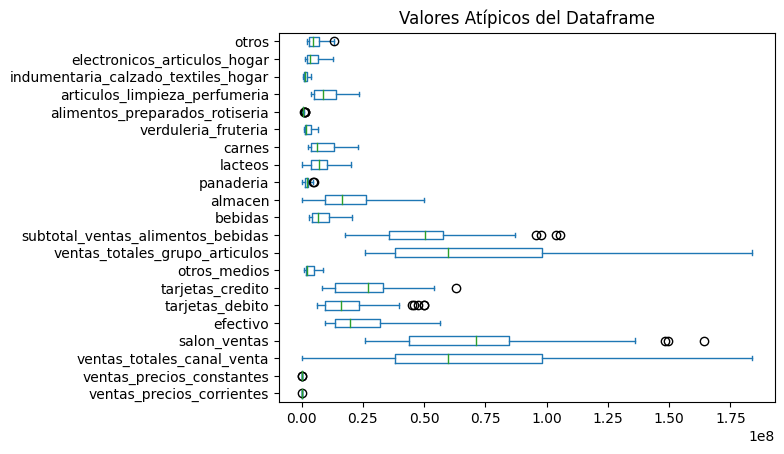

In [28]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))
VT_clean_iqr.plot(kind='box', vert=False)

plt.title("Valores Atípicos del Dataframe")
plt.show()

In [29]:
# Descargar archivo
VT_clean.to_csv("Ventas_Totales_Limpio_Sin_Nulos.csv")
files.download("Ventas_Totales_Limpio_Sin_Nulos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>